# Fixed-active-dormant

## imports

In [1]:
%run ../../setup.py
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
from import_data import get_data

## input file names below

In [2]:
filenames = ['no-behavior.sqlite', 'behavior-example.sqlite']

## grab all data

In [3]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)

    file_data['storage_id'] = file_data['agents'].loc[file_data['agents']["Prototype"] == "Storage"]["AgentId"]
    # transaction subset
    file_data['t_s'] = file_data['transactions'].loc[file_data['transactions']["ReceiverId"] == file_data['storage_id'].item()]
    
    data[name] = file_data

# Plots
## transactions subplots

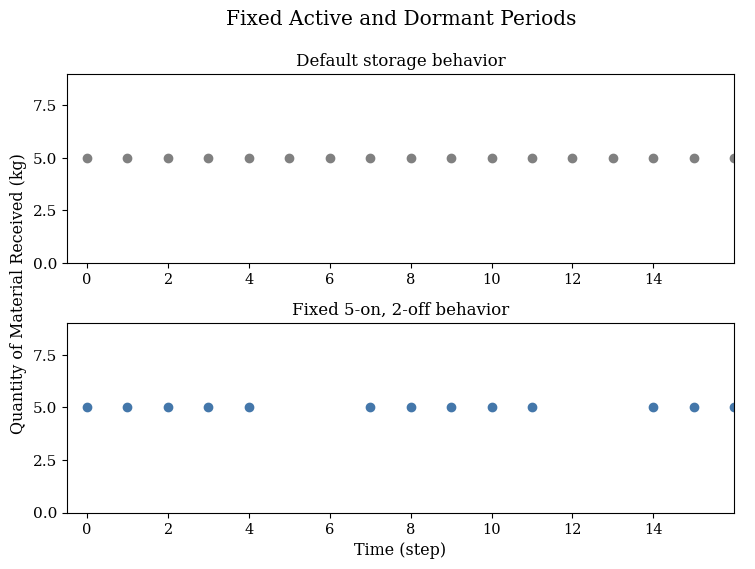

In [4]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Quantity of Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,9)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 10, 2.5))

ax0.scatter(data['no-behavior']['t_s']['Time'],
            data['no-behavior']['t_s']['Quantity'],
            color= '0.5')
ax0.set_title('Default storage behavior')

ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)

ax1.scatter(data['behavior-example']['t_s']['Time'],
            data['behavior-example']['t_s']['Quantity'],
            color= palette[0])
ax1.set_title('Fixed 5-on, 2-off behavior')

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
fig.tight_layout()

#plt.savefig('plots/transactions-subplots', transparent=True)

## Cumulative received subplots

In [5]:
data['no-behavior']['t_s']['CumQuant'] = data['no-behavior']['t_s']['Quantity'].cumsum()
data['behavior-example']['t_s']['CumQuant'] = data['behavior-example']['t_s']['Quantity'].cumsum()

/tmp/ipykernel_61152/1941643306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no-behavior']['t_s']['CumQuant'] = data['no-behavior']['t_s']['Quantity'].cumsum()
/tmp/ipykernel_61152/1941643306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['behavior-example']['t_s']['CumQuant'] = data['behavior-example']['t_s']['Quantity'].cumsum()


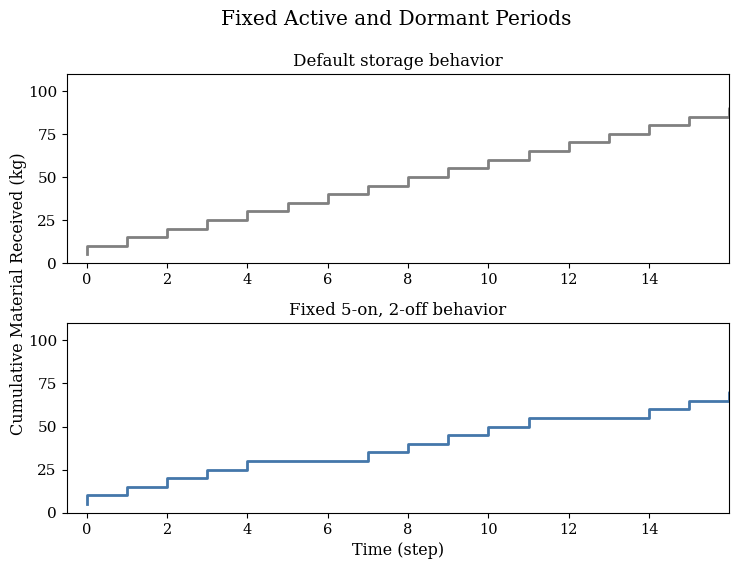

In [6]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,110)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 101, 25))


ax0.step(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['CumQuant'],
         color= '0.5')
ax0.set_title('Default storage behavior')

ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)


ax1.step(data['behavior-example']['t_s']['Time'],
         data['behavior-example']['t_s']['CumQuant'],
         color= palette[0])
ax1.set_title('Fixed 5-on, 2-off behavior')

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
fig.tight_layout()

#plt.savefig('plots/cumulative-subplots', transparent=True)


## Cumulative single plot
### ANS plot

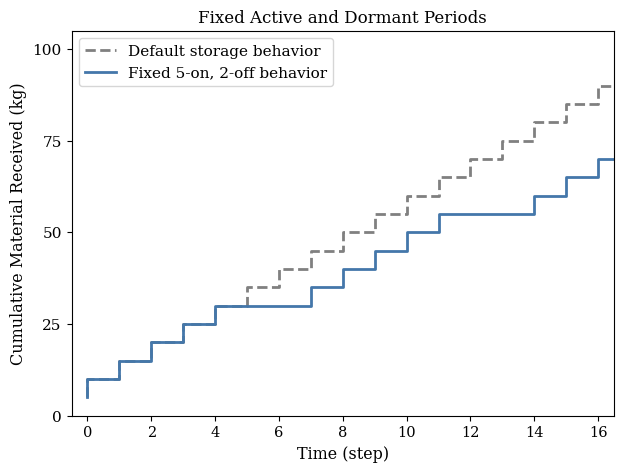

In [7]:
fig = plt.figure(figsize = (7, 5))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,16.5)
plt.ylim(0,105)
ax.set_xticks(np.arange(0, 17, 2))
ax.set_yticks(np.arange(0, 101, 25))


ax.step(data['no-behavior']['t_s']['Time'],
        data['no-behavior']['t_s']['CumQuant'],
        where='pre',
        color= '0.5', ls='dashed', label='Default storage behavior')

ax.step(data['behavior-example']['t_s']['Time'],
        data['behavior-example']['t_s']['CumQuant'],
        where='pre',
        color= palette[0], label='Fixed 5-on, 2-off behavior')

ax.legend(loc = 'upper left')

plt.title('Fixed Active and Dormant Periods')

plt.savefig('plots/cumulative-oneplot-ans', transparent=True, dpi=600)

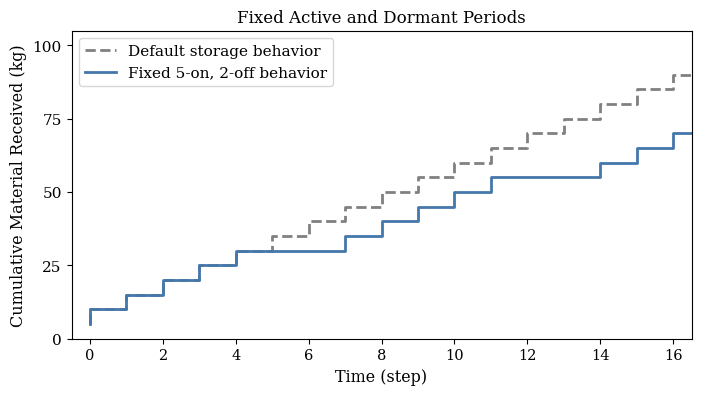

In [8]:
fig = plt.figure(figsize = (8, 4))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,16.5)
plt.ylim(0,105)
ax.set_xticks(np.arange(0, 17, 2))
ax.set_yticks(np.arange(0, 101, 25))


ax.step(data['no-behavior']['t_s']['Time'],
        data['no-behavior']['t_s']['CumQuant'],
        where='pre',
        color= '0.5', ls='dashed', label='Default storage behavior')

ax.step(data['behavior-example']['t_s']['Time'],
        data['behavior-example']['t_s']['CumQuant'],
        where='pre',
        color= palette[0], label='Fixed 5-on, 2-off behavior')

ax.legend(loc = 'upper left')

plt.title('Fixed Active and Dormant Periods')

plt.savefig('plots/cumulative-oneplot-diss', transparent=True, dpi=600)